In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",None)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [55]:

df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\titles.csv")

# Project 
## Movie Recommendation System

# Data Info

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [57]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,"This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries ""Five Came Back.""",1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# Data Cleaning & Handling 

In [58]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [59]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [60]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,"This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries ""Five Came Back.""",1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action.,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,"Intent on seeing the Cahulawassee River before it's turned into one huge lake, outdoor fanatic Lewis Medlock takes his friends on a river-rafting trip they'll never forget into the dangerous American back-country.",1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not to enter, as ""it is a silly place"".",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,"12 American military prisoners in World War II are ordered to infiltrate a well-guarded enemy château and kill the Nazi officers vacationing there. The soldiers, most of whom are facing death sentences for a variety of violent crimes, agree to the mission and the possible commuting of their sentences.",1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [61]:
df.drop(columns=["type","description","age_certification","runtime","production_countries","seasons","imdb_id","imdb_votes","tmdb_popularity"],inplace=True)

In [62]:
df.head()

,id,title,release_year,genres,imdb_score,tmdb_score
0,ts300399,Five Came Back: The Reference Films,1945,['documentation'],NaN,NaN
1,tm84618,Taxi Driver,1976,"['drama', 'crime']",8.2,8.179
2,tm154986,Deliverance,1972,"['drama', 'action', 'thriller', 'european']",7.7,7.300
3,tm127384,Monty Python and the Holy Grail,1975,"['fantasy', 'action', 'comedy']",8.2,7.811
4,tm120801,The Dirty Dozen,1967,"['war', 'action']",7.7,7.600


In [63]:
df.isna().sum()

id                0
title             1
release_year      0
genres            0
imdb_score      482
tmdb_score      311
dtype: int64

In [64]:
df.dropna(subset=["title"],inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5849 non-null   object 
 1   title         5849 non-null   object 
 2   release_year  5849 non-null   int64  
 3   genres        5849 non-null   object 
 4   imdb_score    5368 non-null   float64
 5   tmdb_score    5539 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 319.9+ KB


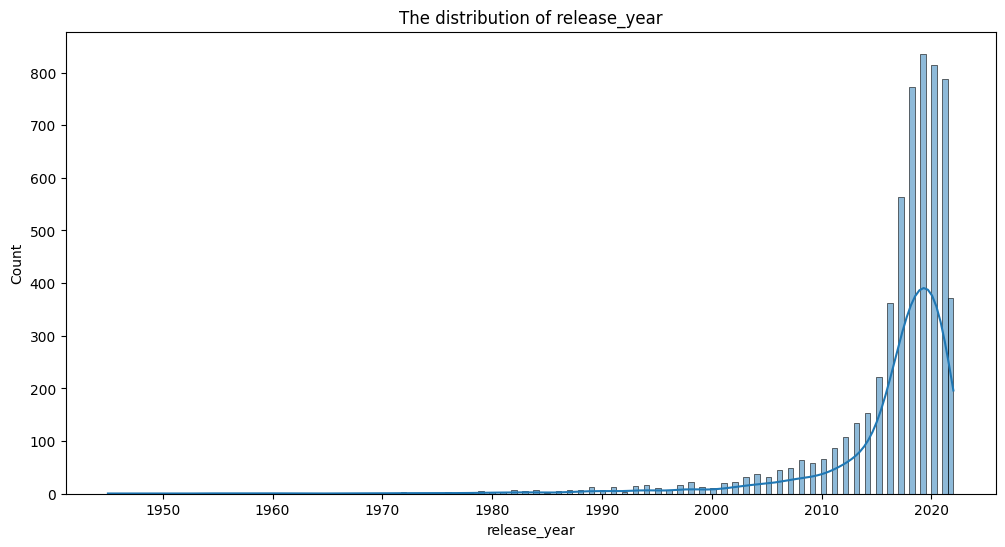

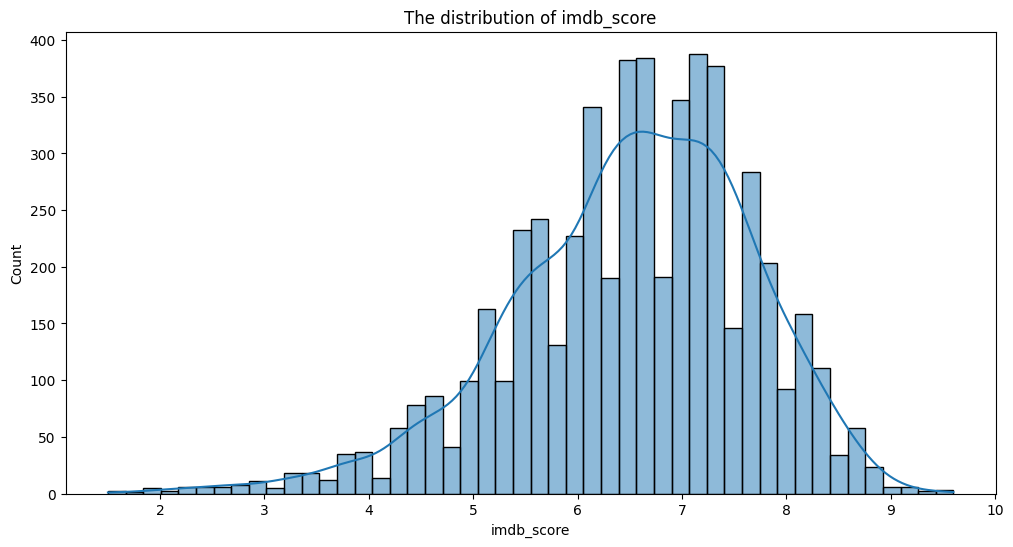

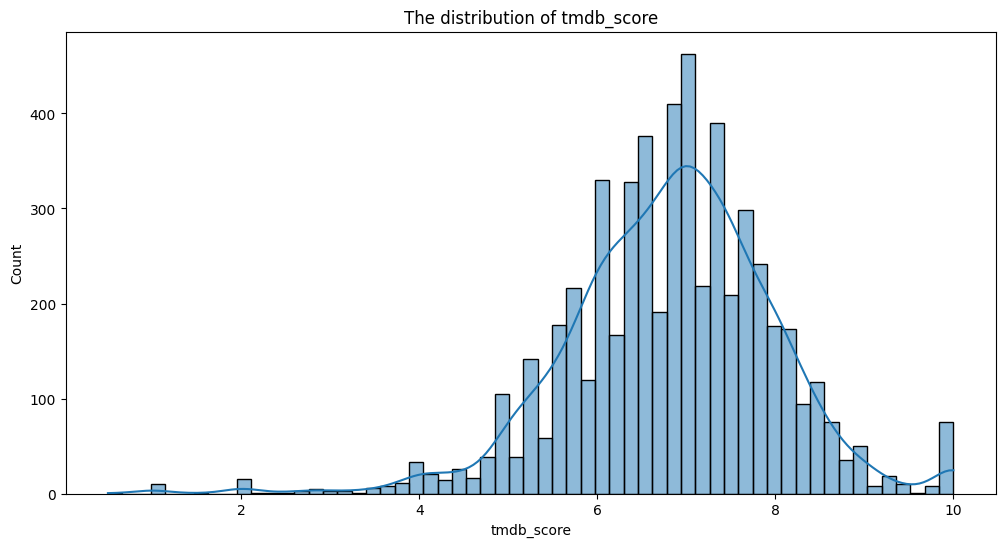

In [66]:
num=df.select_dtypes(include="number")
for col in num:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,palette="Set1")
    plt.title(f"The distribution of {col}")
    plt.show()


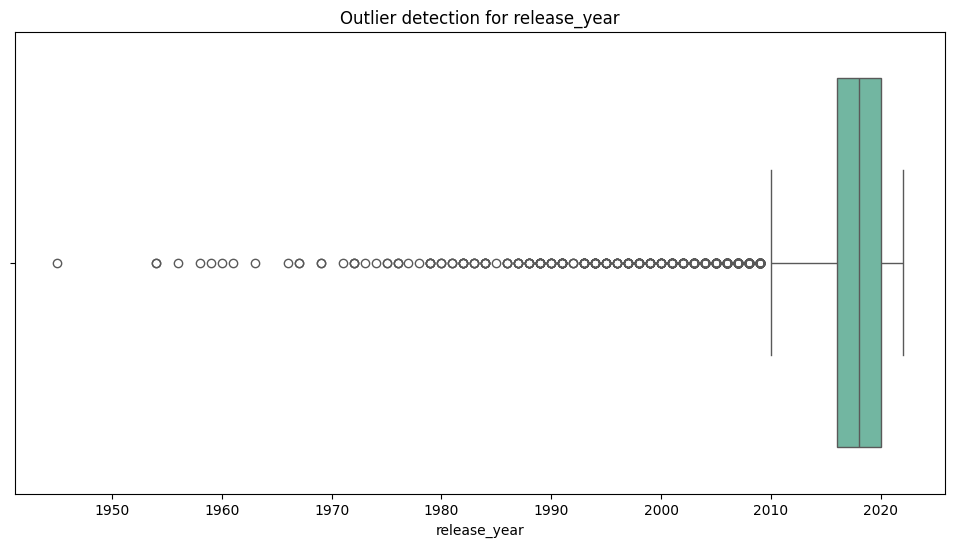

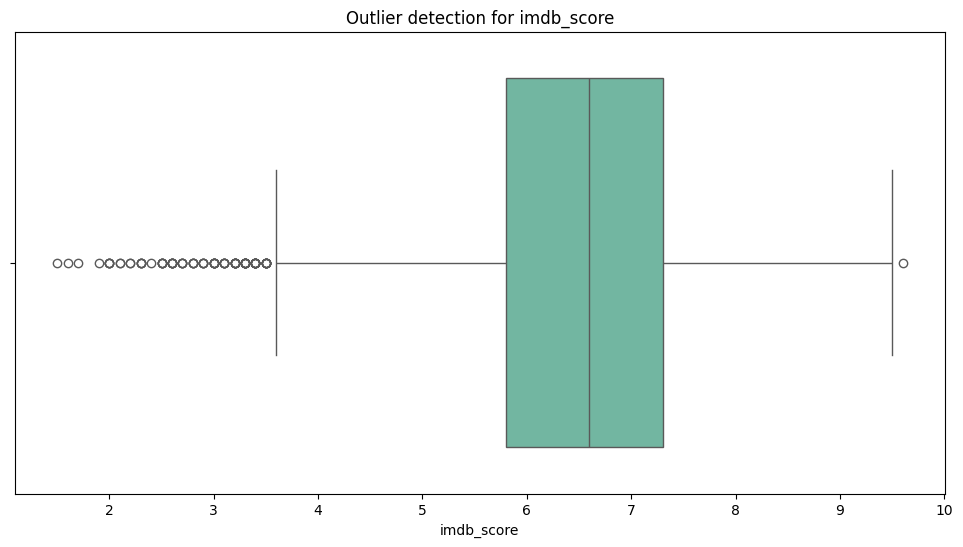

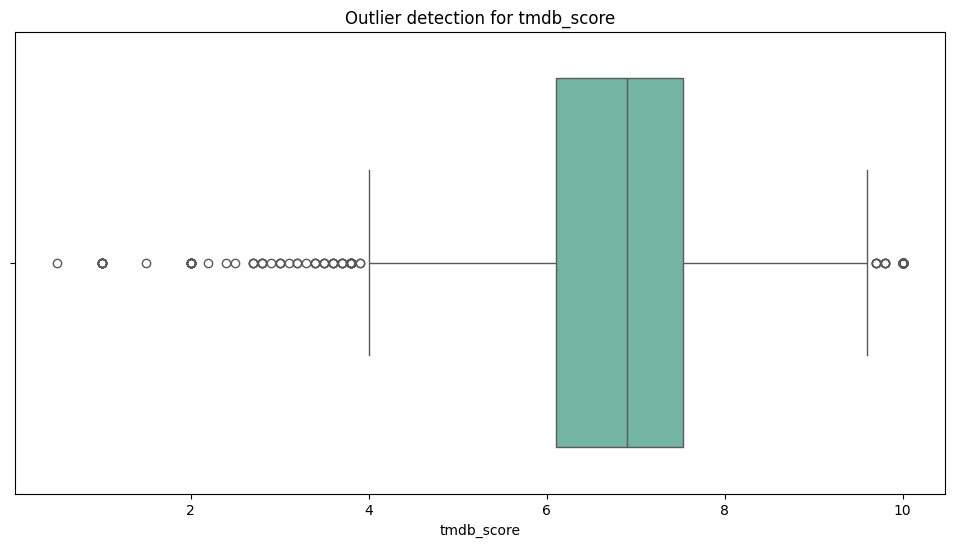

In [67]:
num = df.select_dtypes(include="number")

for col in num:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.title(f"Outlier detection for {col}")
    plt.xlabel(col)
    plt.show()


In [68]:
outlier_summary = {}

for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Display number of outliers per column
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


release_year: 574 outliers
imdb_score: 89 outliers
tmdb_score: 155 outliers


In [69]:
df.head()

,id,title,release_year,genres,imdb_score,tmdb_score
0,ts300399,Five Came Back: The Reference Films,1945,['documentation'],NaN,NaN
1,tm84618,Taxi Driver,1976,"['drama', 'crime']",8.2,8.179
2,tm154986,Deliverance,1972,"['drama', 'action', 'thriller', 'european']",7.7,7.300
3,tm127384,Monty Python and the Holy Grail,1975,"['fantasy', 'action', 'comedy']",8.2,7.811
4,tm120801,The Dirty Dozen,1967,"['war', 'action']",7.7,7.600


In [70]:
df['imdb_score'].fillna(df['imdb_score'].median(), inplace=True)
df['tmdb_score'].fillna(df['tmdb_score'].median(), inplace=True)

In [71]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5849 non-null   object 
 1   title         5849 non-null   object 
 2   release_year  5849 non-null   int64  
 3   genres        5849 non-null   object 
 4   imdb_score    5849 non-null   float64
 5   tmdb_score    5849 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 319.9+ KB


In [73]:
df.head()

,id,title,release_year,genres,imdb_score,tmdb_score
0,ts300399,Five Came Back: The Reference Films,1945,['documentation'],6.6,6.900
1,tm84618,Taxi Driver,1976,"['drama', 'crime']",8.2,8.179
2,tm154986,Deliverance,1972,"['drama', 'action', 'thriller', 'european']",7.7,7.300
3,tm127384,Monty Python and the Holy Grail,1975,"['fantasy', 'action', 'comedy']",8.2,7.811
4,tm120801,The Dirty Dozen,1967,"['war', 'action']",7.7,7.600


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5849 non-null   object 
 1   title         5849 non-null   object 
 2   release_year  5849 non-null   int64  
 3   genres        5849 non-null   object 
 4   imdb_score    5849 non-null   float64
 5   tmdb_score    5849 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 319.9+ KB


In [75]:
df.head()

,id,title,release_year,genres,imdb_score,tmdb_score
0,ts300399,Five Came Back: The Reference Films,1945,['documentation'],6.6,6.900
1,tm84618,Taxi Driver,1976,"['drama', 'crime']",8.2,8.179
2,tm154986,Deliverance,1972,"['drama', 'action', 'thriller', 'european']",7.7,7.300
3,tm127384,Monty Python and the Holy Grail,1975,"['fantasy', 'action', 'comedy']",8.2,7.811
4,tm120801,The Dirty Dozen,1967,"['war', 'action']",7.7,7.600


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 5849
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5849 non-null   object 
 1   title         5849 non-null   object 
 2   release_year  5849 non-null   int64  
 3   genres        5849 non-null   object 
 4   imdb_score    5849 non-null   float64
 5   tmdb_score    5849 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 319.9+ KB


In [77]:
# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df["genres"])

tfidf_matrix


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15088 stored elements and shape (5849, 19)>

In [78]:
df["title"].value_counts()

title
Connected                                    3
The Gift                                     3
Zero                                         2
The Girl Next Door                           2
Manhunt                                      2
                                            ..
Fine Wine                                    1
C/O Kaadhal                                  1
Lokillo                                      1
Dad Stop Embarrassing Me - The Afterparty    1
Mighty Little Bheem: Kite Festival           1
Name: count, Length: 5798, dtype: int64

In [79]:
from sklearn.neighbors import NearestNeighbors

# Fit KNN on your TF-IDF matrix
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(tfidf_matrix)

# Find neighbors for a given movie index
movie_index = df[df['title'] == "The Girl Next Door"].index[0]
distances, indices = knn.kneighbors(tfidf_matrix[movie_index], n_neighbors=6)

# Show recommendations
df.iloc[indices[0][1:]]  # Skip the first one (it's the movie itself)


,id,title,release_year,genres,imdb_score,tmdb_score
1601,tm201855,Katti Batti,2015,"['comedy', 'romance', 'drama']",4.6,5.6
41,tm133087,Steel Magnolias,1989,"['comedy', 'drama', 'romance']",7.3,7.2
39,tm138875,When Harry Met Sally...,1989,"['comedy', 'romance', 'drama']",7.7,7.4
5726,tm996010,Still Out of My League,2021,"['romance', 'comedy', 'drama']",5.5,6.7
1676,tm247767,Kiss of Life,2015,"['romance', 'comedy', 'drama']",5.9,4.3
